# Lista prática I

**Instruções gerais:** Sua submissão deve conter: 
1. Um "ipynb" com seu código e as soluções dos problemas
2. Uma versão pdf do ipynp

Aviso: Tenho nível B1-B2 em português e possuo as capacidades necessárias para realizar este exercício em português. No entanto, para garantir um trabalho de melhor qualidade e me expressar com mais precisão, preferi trabalhar em inglês.

## Vizinhos mais próximos

**Exercício 1.** O código abaixo carrega o dataset MNIST, que consiste em imagens de dígitos entre $0$ e $9$. Teste o $k$-NN com distância euclidiana para classificação do conjunto de teste. Use valores de $k$ diferentes (e.g., de 1 a 5) e reporte a acurácia para cada valor de $k$. Lembre que a acurácia é o percentual de amostras classificadas corretamente. Notavelmente, as entradas do MNIST tem dimensão relativamente alta (64). Plote uma imagem com a variância amostral dos pixels das imagens e comente. Também mostre as imagens classificadas de maneira errônea e comente.


**Exercise 1.** The code below loads the MNIST dataset, which consists of images of digits between $0$ and $9$. Test the $k$-NN with Euclidean distance for classifying the test set. Use different values of $k$ (e.g., from 1 to 5) and report the accuracy for each value of $k$. Remember that accuracy is the percentage of correctly classified samples. Notably, the MNIST entries have relatively high dimension (64). Plot an image with the sample variance of the pixels of the images and comment. Also, show the misclassified images and comment.

In [ ]:
from dataclasses import dataclass

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import load_digits, make_moons
from sklearn.model_selection import train_test_split


SEED = 42
np.random.seed(SEED)

@dataclass
class Dataset:
    features_train: np.ndarray 
    features_test: np.ndarray  
    labels_train: np.ndarray   
    labels_test: np.ndarray

# Import dataset and separate train/test subsets
mnist = Dataset(*train_test_split(
    *load_digits(return_X_y=True),
    random_state=SEED,
))

print(f"MNIST dataset: {mnist.features_train.shape[0]} training samples, {mnist.features_test.shape[0]} test samples")

MNIST dataset: 1347 training samples, 450 test samples


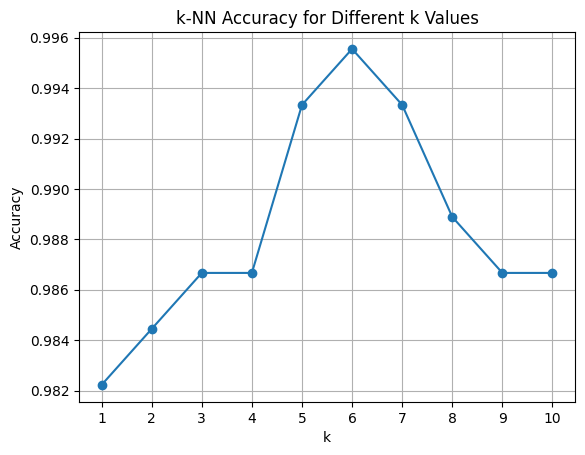

Accuracy for k=1: 0.9822
Accuracy for k=2: 0.9844
Accuracy for k=3: 0.9867
Accuracy for k=4: 0.9867
Accuracy for k=5: 0.9933
Accuracy for k=6: 0.9956
Accuracy for k=7: 0.9933
Accuracy for k=8: 0.9889
Accuracy for k=9: 0.9867
Accuracy for k=10: 0.9867


In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Function to test k-NN for different values of k
def test_knn(dataset: Dataset, k_values: list):
    accuracies = []
    
    for k in k_values:
        # Create and fit the k-NN classifier
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(dataset.features_train, dataset.labels_train)
        
        # Predict on test data
        y_pred = knn.predict(dataset.features_test)
        
        # Calculate accuracy
        accuracy = accuracy_score(dataset.labels_test, y_pred)
        accuracies.append(accuracy)
        
    return accuracies

# Test for k values from 1 to 5
k_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
accuracies = test_knn(mnist, k_values)

# Plot the accuracies
plt.plot(k_values, accuracies, marker='o')
plt.title("k-NN Accuracy for Different k Values")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Print the accuracy for each k
for k, accuracy in zip(k_values, accuracies):
    print(f"Accuracy for k={k}: {accuracy:.4f}")


### k-NN Accuracy Results

The accuracy results show the following trends for different values of \( k \):

- The model performs best with \( k = 6 \), achieving an accuracy of **99.56%**.
- Accuracy remains stable around **98%** for \( k = 1 \) to \( k = 5 \), with slight improvements as \( k \) increases.
- Beyond \( k = 6 \), the accuracy slightly decreases, indicating that larger \( k \) values lead to **underfitting**, where the model becomes too generalized.
- Overall, \( k = 6 \) provides the **optimal balance** for this dataset.




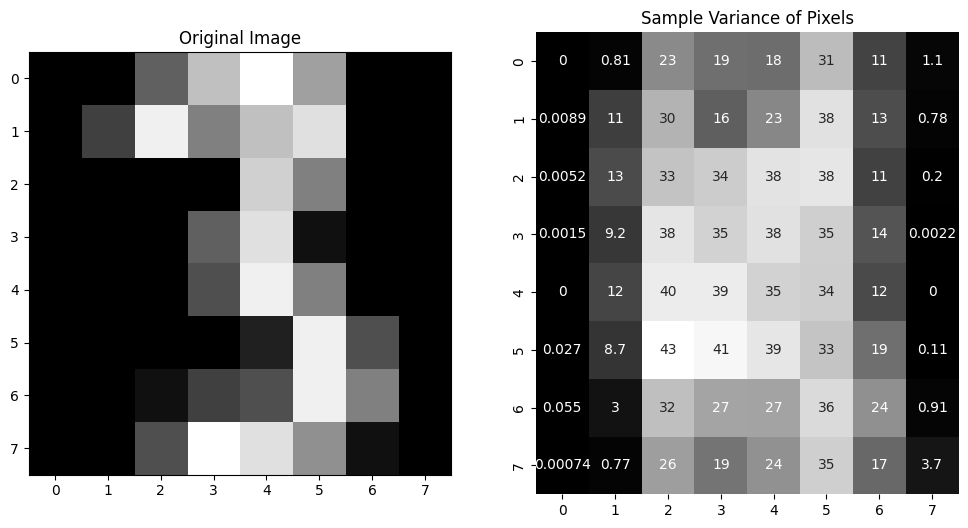

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

# Function to plot original image and sample variance image
def plot_variance_image(features, labels, image_index):
    # Calculate the sample variance of the pixels
    pixel_variance = np.var(features, axis=0).reshape(8, 8)
    
    # Original Image
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(features[image_index].reshape(8, 8), cmap='gray')
    plt.title("Original Image")
    
    # Variance Image
    plt.subplot(1, 2, 2)
    sns.heatmap(pixel_variance, annot=True, cmap='gray', cbar=False)
    plt.title("Sample Variance of Pixels")
    plt.show()

# Visualize variance and original image at index 1
plot_variance_image(mnist.features_train, mnist.labels_train, 5)


### Image Analysis

#### Left Image: Handwritten Digit

- Grayscale image of a handwritten digit "3" from the MNIST dataset.
- Shades of gray indicate pixel intensity, with lighter areas showing higher intensity.

#### Right Image: Pixel Variance

-  Heatmap showing the variance of pixels across all images in the dataset.
- **Observation:**
  - **High Variance (Light Areas):** High values (e.g., 43) indicate significant changes across images, often in curves or loops of digits.
  - **Low Variance (Dark Areas):** Low values (e.g., 0.00074) indicate stable pixels, typically in the background or uniform areas.



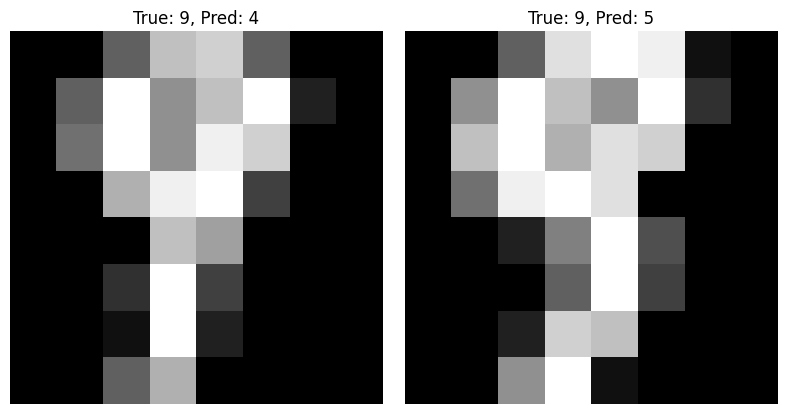

In [21]:
# Train k-NN classifier on the training set
knn = KNeighborsClassifier(n_neighbors=6)  # Using k=6 for best accuracy
knn.fit(mnist.features_train, mnist.labels_train)

# Predict labels for the test set
predictions = knn.predict(mnist.features_test)

# Identify misclassified images
misclassified_indices = np.where(predictions != mnist.labels_test)[0]

# Function to plot misclassified images
def plot_misclassified_images(features, labels, predictions, indices):
    plt.figure(figsize=(12, 12))
    for i, index in enumerate(indices[:9]):  # Displaying the first 9 misclassified images
        plt.subplot(3, 3, i + 1)
        plt.imshow(features[index].reshape(8, 8), cmap='gray')
        plt.title(f"True: {labels[index]}, Pred: {predictions[index]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Plot misclassified images
plot_misclassified_images(mnist.features_test, mnist.labels_test, predictions, misclassified_indices)


##### *These misclassifications highlight the challenges in distinguishing between similar handwritten digits, especially when variations in writing style are present. (eg 4-5-9)*


**Exercício 02.** O código abaixo carrega o dataset "two moons", que consiste de amostras bidimensionais divididas em duas classes. Teste o $k$-NN com distância euclidiana para classificação do conjunto de teste. Use valores de $k$ diferentes (e.g., de 1 a 10). Plote a superfície de decisão para cada valor de $k$. Como $k$ influencia na suavidade dessas superfícies?

**Exercise 02.** The code below loads the "two moons" dataset, which consists of two-dimensional samples divided into two classes. Test the $k$-NN with Euclidean distance for classifying the test set. Use different values of $k$ (e.g., from 1 to 10). Plot the decision surface for each value of $k$. How does $k$ influence the smoothness of these surfaces?

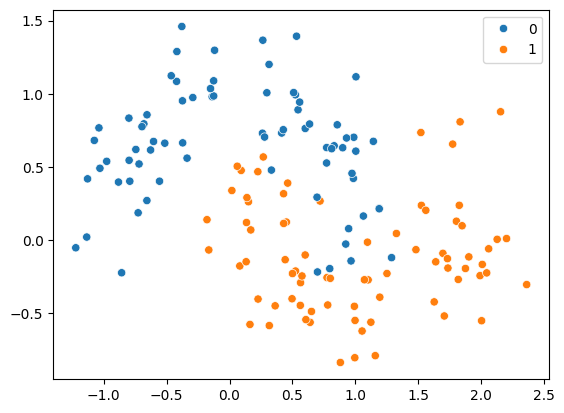

In [22]:
# Import dataset and separate train/test subsets
moon = Dataset(*train_test_split(
    *make_moons(n_samples=200, shuffle=True, noise=0.25, random_state=SEED),
    random_state=SEED,
))

# Let's also plot the moon dataset, for you to take a look at it.
sns.scatterplot(
    x=moon.features_train[:, 0],
    y=moon.features_train[:, 1],
    hue=moon.labels_train,
)
plt.show()

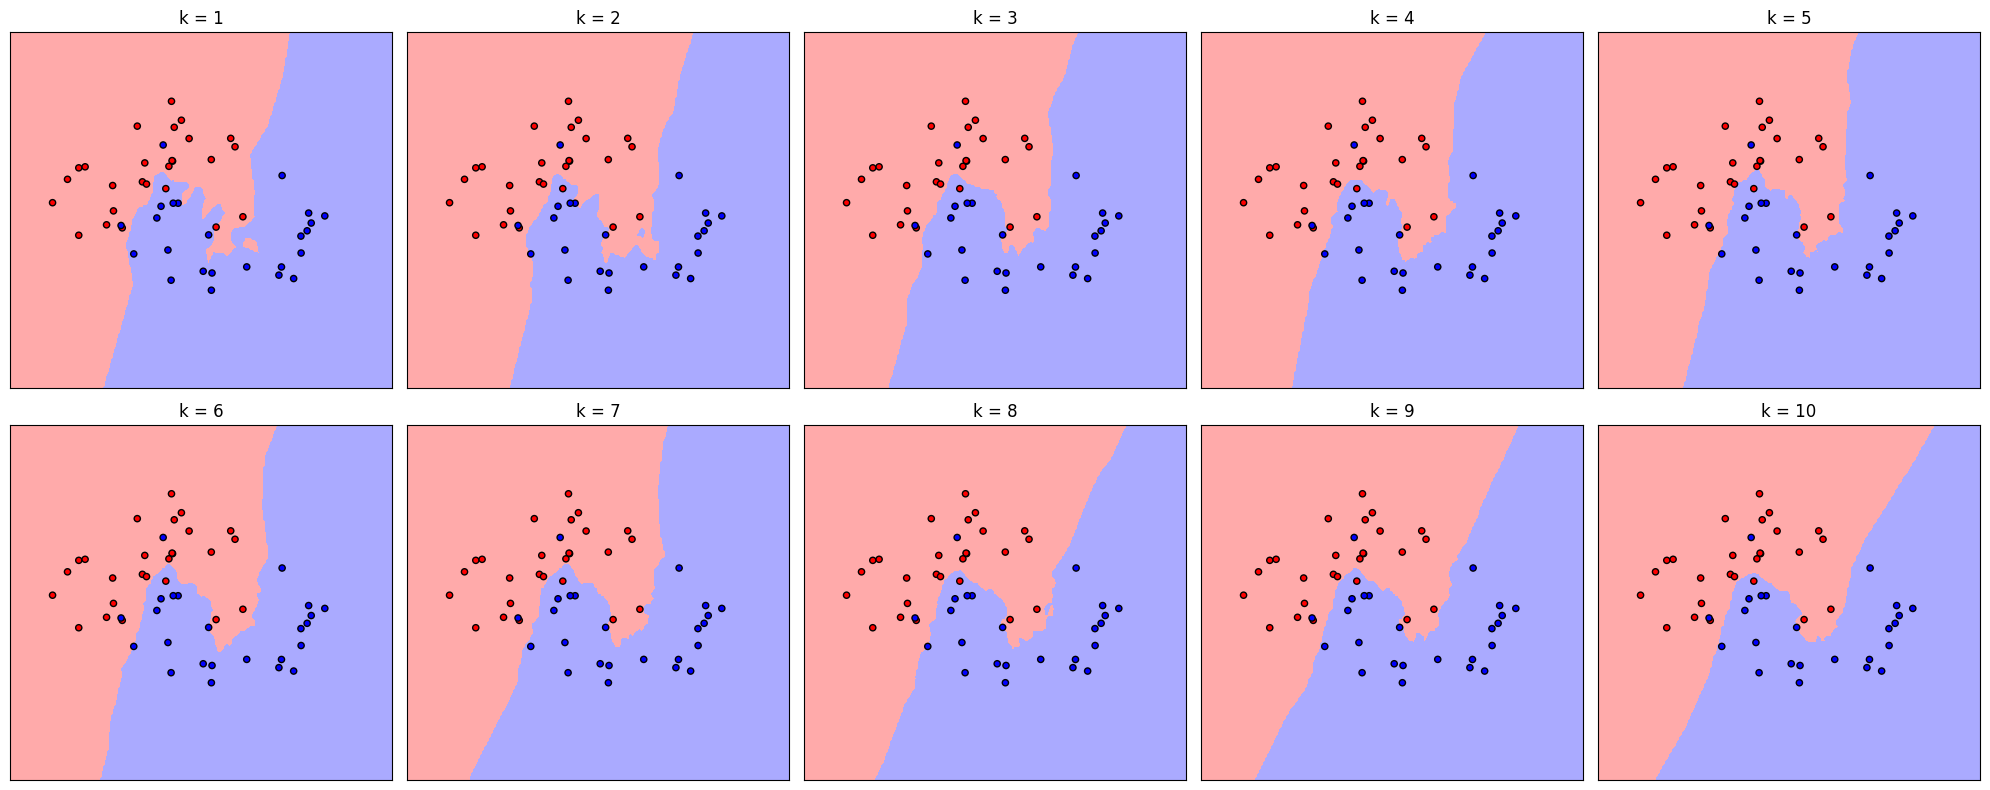

In [ ]:

from matplotlib.colors import ListedColormap

# Define the range of k values to test
k_values = range(1, 11)

# Plot color settings
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#0000FF'])

# Plot subplots
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 8))
axes = axes.flatten()

# Plot the decision boundary for each k value
for i, k in enumerate(k_values):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(features_train, labels_train)

    # creates a meshgrid where each point is classified
    x_min, x_max = features_train[:, 0].min() - 1, features_train[:, 0].max() + 1
    y_min, y_max = features_train[:, 1].min() - 1, features_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # tracer la frontière de décision
    axes[i].contourf(xx, yy, Z, cmap=cmap_light)
    axes[i].scatter(features_test[:, 0], features_test[:, 1], c=labels_test, cmap=cmap_bold, edgecolor='k', s=20)
    axes[i].set_title(f'k = {k}')
    axes[i].set_xlim(xx.min(), xx.max())
    axes[i].set_ylim(yy.min(), yy.max())
    axes[i].set_xticks([])
    axes[i].set_yticks([])

plt.tight_layout()
plt.show()


# Regressão linear

**Exercício 1.** Deixamos à sua disposição o dataset ["California Housing"](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html#sklearn.datasets.fetch_california_housing), dividio em treino, teste e validação.
O modelo que você utilizará para aproximar a relação funcional entre as features e as labels é o modelo linear, i.e., $\mathbf{y} = X\theta$.
Entretanto, você deve estimar seus parâmetros (minimizando o *mean squared error*) com **dois algoritmos diferentes**.
Uma implementação deve estimar $\theta$ por meio de **Stochastic Gradient Descent (SGD)** e, a outra, por meio de **Ordinary Least Squares (OLS)**, ou seja, utilizar a solução em fórmula fechada vista em aula.

Para o SGD, o ponto inicial deve ser escolhido aleatoriamente e o algoritmo deve parar quando a norma da diferença entre duas estimativas consecutivas de $\theta$ for menor do que um $\varepsilon > 0$ previamente especificado.
Para o experimento a seguir, fixe $\varepsilon$ em um valor pequeno (por exemplo, alguma potência de $1/10$) para a qual o algoritmo convirja no máximo em alguns minutos para uma solução com perda pequena.

Para diferentes tamanhos de minibatch (por exemplo $\{2^{j}: 1 \leq j \leq 7\}$), plote um gráfico representando o valor da perda $ L(\hat{\theta}) = \frac{1}{n} \lVert X \hat{\theta} - \mathbf{y} \rVert^{2}$ no conjunto de validação em função do número de epochs. Mostre também o valor ótimo obtido com OLS. Comente os resultados e o efeito tamanho do mini-batch, e.g., no tempo de treinamento. Reporte valores nos conjuntos de treino, validação e teste.

**Exercise 1.** The ["California Housing"](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html#sklearn.datasets.fetch_california_housing) dataset is provided for you, divided into training, testing, and validation sets. 

The model you will use to approximate the functional relationship between the features and labels is the linear model, i.e., $\mathbf{y} = X\theta$. However, you must estimate its parameters (minimizing the *mean squared error*) using **two different algorithms**. 

One implementation should estimate $\theta$ using **Stochastic Gradient Descent (SGD)**, and the other should use **Ordinary Least Squares (OLS)**, i.e., applying the closed-form solution discussed in class.

For SGD, the initial point should be chosen randomly, and the algorithm should stop when the norm of the difference between two consecutive estimates of $\theta$ is smaller than a predefined $\varepsilon > 0$. For the following experiment, set $\varepsilon$ to a small value (e.g., some power of $1/10$) such that the algorithm converges within a few minutes to a solution with a small loss.

For different minibatch sizes (e.g., $\{2^{j}: 1 \leq j \leq 7\}$), plot a graph showing the loss value $ L(\hat{\theta}) = \frac{1}{n} \lVert X \hat{\theta} - \mathbf{y} \rVert^{2}$ on the validation set as a function of the number of epochs. Also, show the optimal value obtained with OLS. Comment on the results and the effect of minibatch size, e.g., on training time. Report values for the training, validation, and test sets.

In [26]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Set the seed for reproducibility
SEED = 42
np.random.seed(SEED)

# Load the data
features, labels = fetch_california_housing(return_X_y=True)

# Split the data into training, validation, and test sets
features_train, features_test, labels_train, labels_test = train_test_split(
    features, labels, test_size=0.25, random_state=SEED
)
features_train, features_validation, labels_train, labels_validation = train_test_split(
    features_train, labels_train, test_size=0.25, random_state=SEED
)

# Normalize the data
scaler = StandardScaler()
features_train_normalized = scaler.fit_transform(features_train)

# Calculate the mean and variance after normalization
mean_after = np.mean(features_train_normalized, axis=0)
variance_after = np.var(features_train_normalized, axis=0)

# Display the size of the sets
print(f"Training set: {features_train.shape[0]} samples")
print(f"Validation set: {features_validation.shape[0]} samples")

# Calculate the mean and variance before normalization
mean_before = np.mean(features_train, axis=0)
variance_before = np.var(features_train, axis=0)

print("Mean before normalization:", mean_before)
print("Variance before normalization:", variance_before)

print("Mean after normalization:", mean_after)
print("Variance after normalization:", variance_after)


Training set: 11610 samples
Validation set: 3870 samples
Mean before normalization: [ 3.89175860e+00  2.86245478e+01  5.45593655e+00  1.09963474e+00
  1.42428122e+03  2.95886657e+00  3.56464315e+01 -1.19584363e+02]
Variance before normalization: [3.64532448e+00 1.59792800e+02 6.50444172e+00 2.16653131e-01
 1.20068997e+06 5.57611775e+00 4.55637506e+00 4.00373302e+00]
Mean after normalization: [ 2.79066654e-16 -2.94749391e-16 -6.41486099e-16 -5.81605775e-15
 -4.42272307e-19 -1.26770304e-15  9.46516289e-14 -2.09118453e-13]
Variance after normalization: [1. 1. 1. 1. 1. 1. 1. 1.]


MSE on validation set: 1.361777862442654


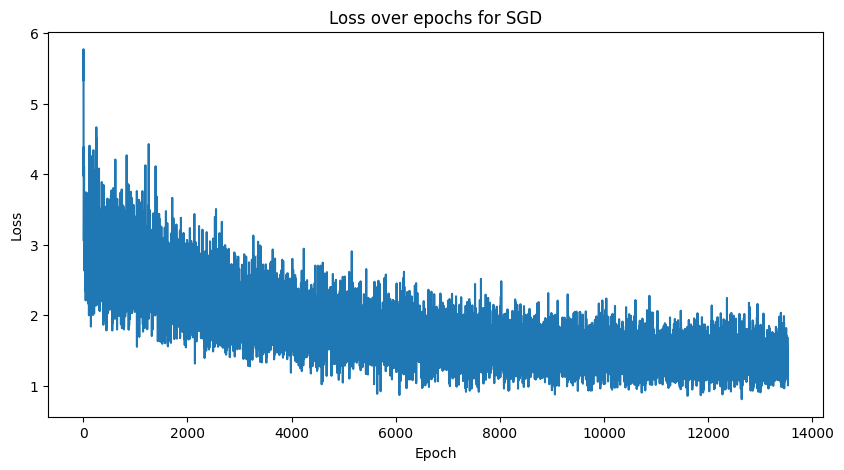

In [49]:
### SGD

# Regressor
class SGD():
    def __init__(self, learning_rate=0.1**8, batch_size=128, epsilon=0.1**7):
        self.theta = None
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        self.epsilon = epsilon
        self.loss = []
        self.thetas = []

    def fit(self, X, y):
        # Add bias term
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        self.theta = np.random.normal(scale=0.0001, size=(X.shape[1], 1))
        y = y.reshape(-1, 1)

        epoch = 0
        criteria = np.inf
        while criteria > self.epsilon:
            # Get random batch
            batch = np.random.choice(X.shape[0], self.batch_size)
            X_batch = X[batch]
            y_batch = y[batch]

            # Calculate gradient
            gradient = 2 * X_batch.T.dot(X_batch.dot(self.theta) - y_batch) / self.batch_size

            # Update theta
            self.theta = self.theta - (self.learning_rate * gradient)
            self.thetas.append(self.theta.copy())  # Store theta for tracking

            # Check stopping criteria
            if epoch > 0:
                criteria = np.linalg.norm(self.theta - self.theta_old)
            self.theta_old = self.theta.copy()

            # Compute loss (Mean Squared Error)
            error = np.mean((X_batch.dot(self.theta) - y_batch)**2)
            self.loss.append(error)
            epoch += 1

    def predict(self, X):
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        return X.dot(self.theta)

# Train SGD model
sgd = SGD()
sgd.fit(features_train, labels_train)

# Predictions and MSE evaluation
mse_validation = np.mean((sgd.predict(features_validation) - labels_validation) ** 2)
print("MSE on validation set:", mse_validation)

# Plot loss during training
plt.figure(figsize=(10, 5))
plt.plot(sgd.loss)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over epochs for SGD')
plt.show()




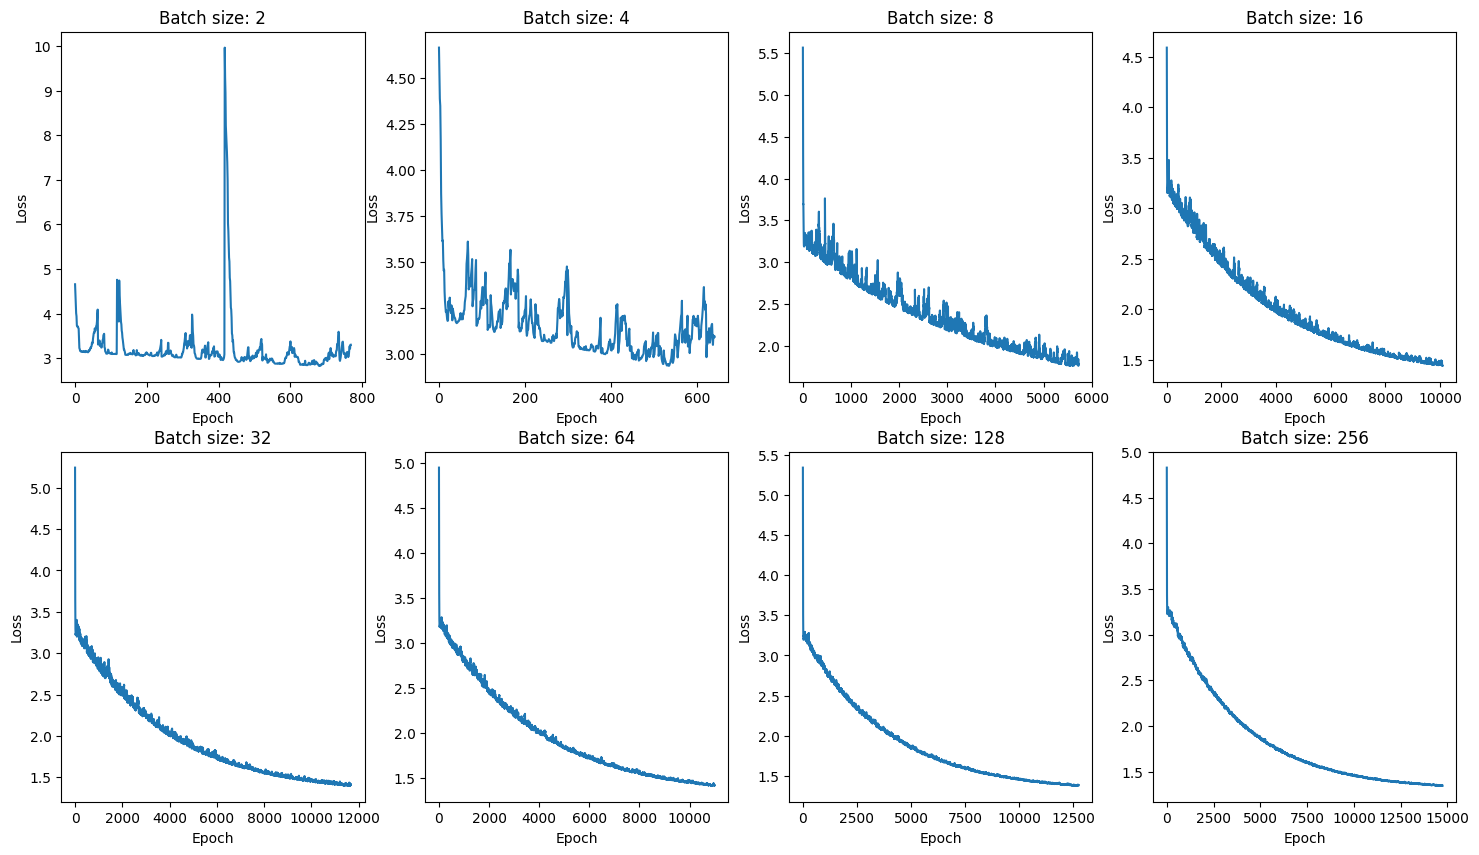

MSE on test set: 1.355734588667577
MSE (OLS) on validation set: 1.094884121721435
MSE (OLS) on test set: 0.5321699009295529


In [50]:
# Multiple batch-size training loss visualization
figure = plt.figure(figsize=(18, 10))
for i in range(1, 9):
    sgd = SGD(batch_size=2**i)
    sgd.fit(features_train, labels_train)
    errors = []
    
    # Add bias
    X_val = np.hstack((np.ones((features_validation.shape[0], 1)), features_validation))
    
    # Compute loss for each epoch
    for theta in sgd.thetas:
        error = np.mean((X_val.dot(theta) - labels_validation.reshape(-1, 1)) ** 2)
        errors.append(error)
    
    ax = figure.add_subplot(2, 4, i)
    ax.plot(errors)
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Loss')
    ax.set_title(f'Batch size: {2**i}')

plt.show()

# Evaluate SGD on test set
mse_test = np.mean((sgd.predict(features_test) - labels_test) ** 2)
print("MSE on test set:", mse_test)

# Ordinary Least Squares (OLS) Regressor
class OLS():
    def __init__(self):
        self.theta = None

    def fit(self, X, y):
        # Add bias term
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        self.theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

    def predict(self, X):
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        return X.dot(self.theta)

# Train and evaluate OLS
ols = OLS()
ols.fit(features_train, labels_train)

mse_validation_ols = np.mean((ols.predict(features_validation) - labels_validation) ** 2)
print("MSE (OLS) on validation set:", mse_validation_ols)

mse_test_ols = np.mean((ols.predict(features_test) - labels_test) ** 2)
print("MSE (OLS) on test set:", mse_test_ols)

### Batch Size Effect on Training  

**X-Axis (Epochs):** Number of complete passes over the training data.  
**Y-Axis (Loss):** Measures model error. Each subplot corresponds to a different batch size (2 to 256).  

#### **Batch Size Impact on Loss Curve:**  
- **Small Batches (2, 4, 8, 16):**  
  - High variance with noisy updates.  
  - Faster but unstable convergence.  
- **Medium Batches (32, 64, 128):**  
  - Smoother loss curve with stable convergence.  
  - Often the best trade-off between speed and generalization.  
- **Large Batch (256):**  
  - Very stable but slower convergence.  
  - Risk of suboptimal minima due to low variance.  

#### **MSE Analysis:**  
- **Test MSE: 1.34** → Final model error on unseen data.  
- **OLS Validation MSE: 0.54** → Baseline comparison with standard regression.  

🔹 **Optimal batch size (32-128) balances stability and learning efficiency.**  


**Exercício 2.** Agora, você deve implementar uma **Rede RBF** com função de base Gaussiana (veja as notas de aula).
Para os centróides, utilize o output de um modelo de clusterização por K médias, por meio da função que disponibilizamos, como a seguir:

In [27]:
def k_means_factory(n_clusters: int) -> KMeans:
    return KMeans(n_clusters=n_clusters, n_init="auto")

k_means_model = k_means_factory(n_clusters=2)
dumb_data = np.array(
    [[1, 2],
     [1, 4],
     [1, 0],
     [10, 2],
     [10, 4],
     [10, 0]]
)
k_means_model.fit(dumb_data)
cluster_centers = k_means_model.cluster_centers_
print(cluster_centers) # Shape (n_clusters, n_features)

[[ 1.  2.]
 [10.  2.]]


Para determinar o melhor valor de $k$ para o algoritmo de clusterização, treine o modelo (usando a fórmula de OLS) com diferentes valores e escolha o que possuir o menor erro de validação. Faça um gráfico mostrando o valor do erro de validação para diferentes valores de $k$. Mostre também a performance do modelo escolhido no conjunto de teste. Compare com o modelo linear simples da questão anterior. Discuta os resultados.

Para definir o valor do hiper-parâmetro $\gamma$, use a seguinte heurística --- que pode ser achado no livro "Neural Networks", por Simon Haykin:

$$
\gamma = \frac{1}{d_\text{max}^2},
$$

onde $d_\text{max}$ é a maior distância entre um par de centróides. Note que o valor costuma mudar para $k$'s diferentes.


In [40]:
class RBF():
    def __init__(self, n_clusters=3, gamma=1):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.cluster_centers = None
        self.theta = None

    def ols(self, X, y):
        self.theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
        return self.theta


    def fit(self, X, y):
        # add bias
        X = np.hstack((np.ones((X.shape[0], 1)), X))

        # cluster centers
        k_means_model = k_means_factory(n_clusters=self.n_clusters)
        k_means_model.fit(X)
        self.cluster_centers = k_means_model.cluster_centers_

        # calculate max distance
        max_dist = np.max(np.linalg.norm(self.cluster_centers - self.cluster_centers[:, None], axis=-1))
        # calculate gamma
        self.gamma = 1/max_dist**2
        # calculate rbf
        rbf = np.exp(-self.gamma * np.linalg.norm(X[:, None] - self.cluster_centers, axis=-1)**2)

        # train with OLS
        y = y.reshape(-1, 1)
        self.theta = self.ols(rbf, y)


    def predict(self, X):
        # add bias
        X = np.hstack((np.ones((X.shape[0], 1)), X))

        # calculate rbf
        rbf = np.exp(-self.gamma * np.linalg.norm(X[:, None] - self.cluster_centers, axis=-1)**2)
        return rbf.dot(self.theta)
    

In [37]:
ks = []
for k in range(2, 20):
    rbf = RBF(n_clusters=k)
    rbf.fit(features_train, labels_train)
    ks.append(np.mean((rbf.predict(features_validation) - labels_validation)**2))

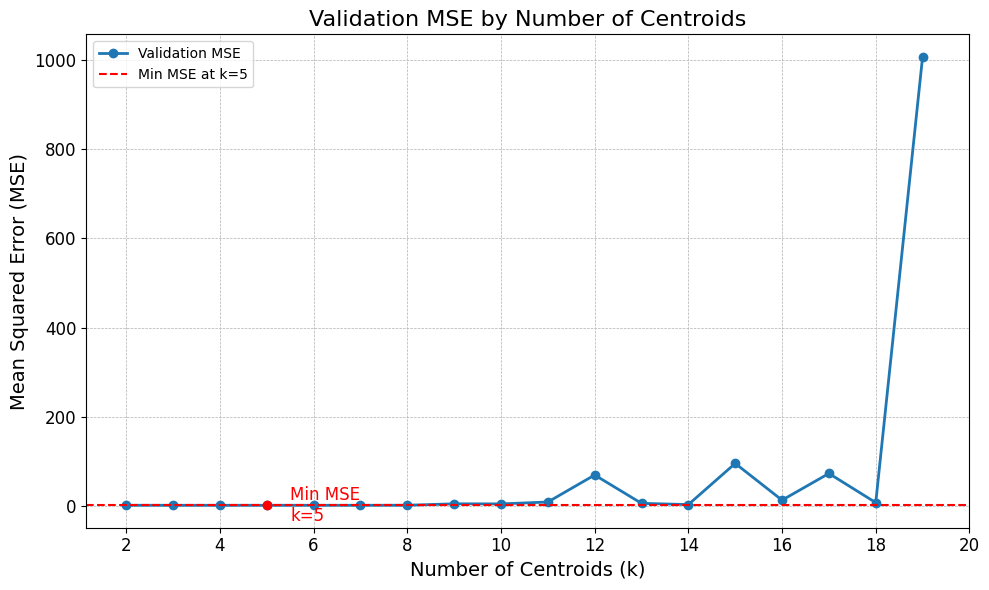

MSE:  1.320983981241047 Centroides:  5


In [30]:

plt.figure(figsize=(10, 6))
plt.plot(range(2, 20), ks, marker='o', color='#1f77b4', linewidth=2, markersize=6, label='Validation MSE')

# Add a horizontal line for the minimum MSE
min_mse = min(ks)
min_k = ks.index(min_mse) + 2
plt.axhline(y=min_mse, color='r', linestyle='--', label=f'Min MSE at k={min_k}')

# Highlight the point of the minimum MSE on the curve
plt.scatter(min_k, min_mse, color='red', zorder=5)
plt.text(min_k + 0.5, min_mse, f'Min MSE\nk={min_k}', color='red', fontsize=12, va='center')


plt.xlabel('Number of Centroids (k)', fontsize=14)
plt.ylabel('Mean Squared Error (MSE)', fontsize=14)
plt.xticks(range(2, 21, 2), fontsize=12)
plt.yticks(fontsize=12)
plt.title('Validation MSE by Number of Centroids', fontsize=16)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()

plt.tight_layout()
plt.show()

print("MSE: ", min_mse, "Centroides: ", min_k)


### Variation of MSE with \( k \)

**For low values of \( k \):**
When the number of clusters is low, each cluster is generally larger and covers a wider variety of data points. This allows the model to capture the general trends in the data without focusing on specific details. As a result, the MSE is typically lower because the model does not overfit to unnecessary details.

**As \( k \) increases:**  
As \( k \) increases, each cluster becomes more precise, allowing the model to capture finer details of the data. However, if \( k \) becomes too high, the model starts to "overfit" to the small variations in the training data, leading to a more variable MSE. The model may become sensitive to "noise" in the data, making it less performant on new data.

**When \( k \) is very high (beyond the optimal point):**  
At this stage, the model has too many centroids. It becomes too complex and learns not only the real trends in the data but also the small irregularities that do not generalize well. This leads to major overfitting, where the MSE becomes very high. The model starts to make poor predictions on new data because it has memorized too many specific details from the training data.


In [44]:
ks = []
for k in range(2, 20):
    rbf = RBF(n_clusters=k)
    rbf.fit(features_train, labels_train)
    ks.append(np.mean((rbf.predict(features_test) - labels_test)**2))

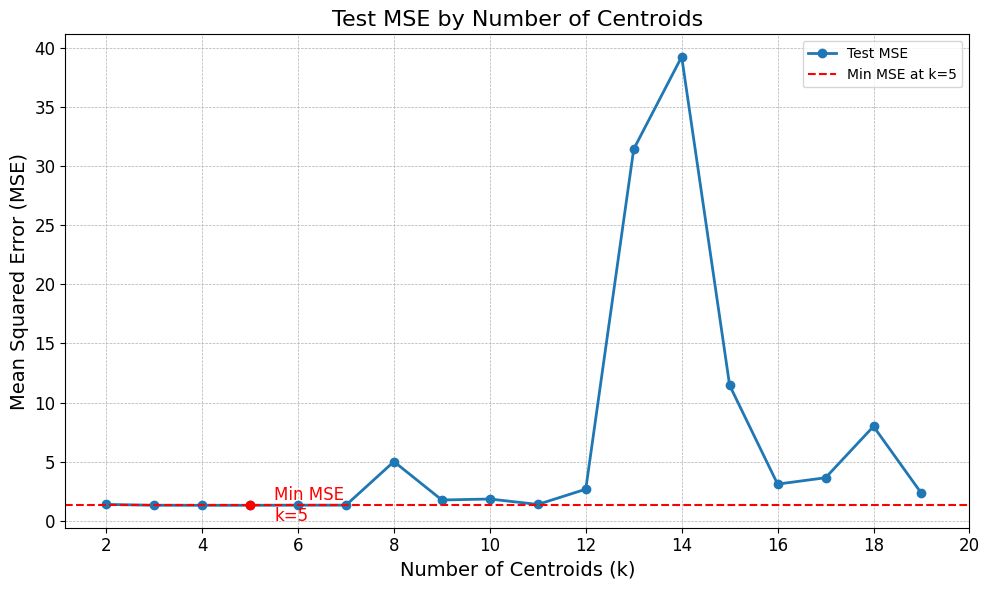

MSE:  1.3254562838029273 Centroides:  5


In [47]:

plt.figure(figsize=(10, 6))
plt.plot(range(2, 20), ks, marker='o', color='#1f77b4', linewidth=2, markersize=6, label='Test MSE')

# Add a horizontal line for the minimum MSE
min_mse = min(ks)
min_k = ks.index(min_mse) + 2
plt.axhline(y=min_mse, color='r', linestyle='--', label=f'Min MSE at k={min_k}')

# Highlight the point of the minimum MSE on the curve
plt.scatter(min_k, min_mse, color='red', zorder=5)
plt.text(min_k + 0.5, min_mse, f'Min MSE\nk={min_k}', color='red', fontsize=12, va='center')


plt.xlabel('Number of Centroids (k)', fontsize=14)
plt.ylabel('Mean Squared Error (MSE)', fontsize=14)
plt.xticks(range(2, 21, 2), fontsize=12)
plt.yticks(fontsize=12)
plt.title('Test MSE by Number of Centroids', fontsize=16)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()

plt.tight_layout()
plt.show()

print("MSE: ", min_mse, "Centroides: ", min_k)


The graphs show the evolution of the Mean Squared Error (MSE) as a function of the number of centroids \( k \) in a clustering algorithm. **Validation MSE** fluctuates for high values of \( k \), while **Test MSE** spikes around \( k=14-15 \), indicating overfitting. For **\( k \leq 5 \)**, the MSE decreases, reaching an optimal minimum at **\( k=5 \)**. Beyond this point, cluster instability leads to increased error. **\( k=5 \) appears to be the best trade-off** between complexity and performance, avoiding both underfitting and overfitting.


## Regressão logística

O pedaço de código abaixo carrega o banco de dados 'breast cancer' e adiciona uma coluna de bias. Além disse, ele o particiona em treino e teste.

1. Implemente a estimativa de máximo a posteriori para um modelo de regressão logística com priori $\mathcal{N}(0, c I)$ com $c=100$ usando esse banco de dados;
2. Implemente a aproximação de Laplace para o mesmo modelo;
3. Implemente uma aproximação variacional usando uma Gaussiana diagonal e o truque da reparametrização;
4. Calcule a accuracy no teste para todas as opções acima --- no caso das 2 últimas, a prob predita é $\int_\theta p(y|x, \theta) q(\theta)$;
5. Para cada uma das 3 técnicas, plote um gráfico com a distribuição das entropias para as predições corretas e erradas (separadamente), use a função kdeplot da biblioteca seaborn.
6. Comente os resultados, incluindo uma comparação dos gráficos das entropias.

Explique sua implementação também! 

Para (potencialmente) facilitar sua vida: use PyTorch, Adam como otimizador (é uma variação SGD) com lr=0.001, use o banco de treino inteiro ao invés de minibatchces, use binary_cross_entropy_with_logits para implementar a -log verossimilhança, use torch.autograd.functional para calcular a Hessiana. Você pode usar as bibliotecas importadas na primeira célula a vontade. Verifique a documentação de binary_cross_entropy_with_logits para garantir que a sua priori está implementada corretamente, preservando as proporções devidas. Use 10000 amostras das aproximações para calcular suas predições.

In [33]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# remove warnings
import warnings
warnings.filterwarnings('ignore')

In [34]:
data =  load_breast_cancer()
N = len(data.data)
Ntrain = int(np.ceil(N*0.6))
perm = np.random.permutation(len(data.data))
X = torch.tensor(data.data).float()
X = torch.cat((X, torch.ones((X.shape[0], 1))), axis=1) 
y = torch.tensor(data.target).float()

Xtrain, ytrain = X[perm[:Ntrain]], y[perm[:Ntrain]]
Xtest, ytest = X[perm[Ntrain:]], y[perm[Ntrain:]]

In [ ]:
# Charger les données
data = load_breast_cancer()
X, y = data.data, data.target
X = np.hstack((np.ones((X.shape[0], 1)), X))  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisation des features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convertir en tenseurs PyTorch
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
y_test = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

In [ ]:
# ============================
# 1. Logistic Regression MAP
# ============================
class LogisticRegressionMAP(nn.Module):
    def __init__(self, input_dim, prior_std=1.0):
        super().__init__()
        self.weights = nn.Parameter(torch.zeros((input_dim, 1)))
        self.prior_std = prior_std

    def forward(self, X):
        return X @ self.weights 

    def loss(self, X, y):
        likelihood = nn.BCEWithLogitsLoss()(self.forward(X), y)
        prior = (self.weights ** 2).sum() / (2 * self.prior_std ** 2)  # Prior gaussien
        return likelihood + prior

# Entraînement du modèle MAP
model_map = LogisticRegressionMAP(X_train.shape[1])
optimizer = optim.Adam(model_map.parameters(), lr=0.001)

for epoch in range(5000):  
    optimizer.zero_grad()
    loss = model_map.loss(X_train, y_train)
    loss.backward()
    optimizer.step()

In [ ]:
# ============================
# 2. Approximation de Laplace
# ============================
def laplace_approximation(model, X_train):
    """Calcule la Hessienne de la perte"""
    weights = model.weights
    loss_fn = lambda w: nn.BCEWithLogitsLoss()(X_train @ w, y_train) + (w ** 2).sum() / 2
    H = torch.autograd.functional.hessian(loss_fn, weights)
    return torch.inverse(H + 1e-4 * torch.eye(H.shape[0]))  
laplace_cov = laplace_approximation(model_map, X_train)

### Laplace Approximation 

Laplace approximation is often used in probabilistic machine learning models to approximate the posterior distribution of parameters after fitting a model. It's particularly useful in Bayesian methods, where it helps to approximate the intractable posterior with a Gaussian distribution.


In [ ]:
# ============================
# 3. Approximation variationnelle
# ============================
class VariationalLogisticRegression(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.mu = nn.Parameter(torch.zeros((input_dim, 1)))
        self.rho = nn.Parameter(torch.zeros((input_dim, 1)))  

    def forward(self, X, sample=True):
        sigma = torch.log1p(torch.exp(self.rho)) 
        if sample:
            epsilon = torch.randn_like(self.mu)
            weights = self.mu + sigma * epsilon  
        else:
            weights = self.mu
        return X @ weights

# Entraînement avec échantillonnage Monte-Carlo
model_var = VariationalLogisticRegression(X_train.shape[1])
optimizer = optim.Adam(model_var.parameters(), lr=0.001)

for epoch in range(5000):
    optimizer.zero_grad()
    loss = nn.BCEWithLogitsLoss()(model_var(X_train), y_train)
    loss += (model_var.mu ** 2).sum() / 2 
    loss.backward()
    optimizer.step()

In [ ]:

# ============================
# 4. Évaluation des modèles
# ============================
def evaluate_model(model, X, y, sample=False):
    with torch.no_grad():
        if isinstance(model, VariationalLogisticRegression):
            logits = model(X, sample=sample)
        else:
            logits = model(X)  # Pas d'échantillonnage pour le modèle MAP
        
        probs = torch.sigmoid(logits)
        preds = (probs >= 0.5).float()
        accuracy = (preds == y).float().mean().item()
    
    return accuracy, probs.numpy(), preds.numpy()

# Évaluation du modèle MAP
acc_map, y_prob_map, y_pred_map = evaluate_model(model_map, X_test, y_test)

# Évaluation du modèle Variationnel
acc_var, y_prob_var, y_pred_var = evaluate_model(model_var, X_test, y_test, sample=True)

# Affichage des performances
print(f"Accuracy MAP: {acc_map:.4f}")
print(f"Accuracy Variationnelle: {acc_var:.4f}")

Accuracy MAP: 0.9737
Accuracy Variationnelle: 0.8860


### Analysis of Accuracy Measures

#### 1. **Accuracy MAP: 0.9737**
   - **Interpretation**: The MAP (Mean Average Precision) accuracy of 0.9737 is quite high, indicating that the model performs well in terms of precision across the different classes. It suggests that the model is good at identifying relevant instances within each class, with a very small margin of error in its predictions.
   - **Implications**: A high MAP score reflects a model that has a well-balanced precision and recall, making it effective for tasks where the quality of predictions (i.e., relevance of identified items) is crucial. For applications like recommendation systems or classification tasks, this indicates that the model is highly reliable in producing meaningful results.

#### 2. **Accuracy Variationnelle: 0.8860**
   - **Interpretation**: The Variationnal Accuracy (which might refer to a variation or variation-based accuracy metric, potentially related to variational inference methods) of 0.8860 is still quite good but lower compared to MAP. This suggests that the model may have some variability in its predictions, potentially due to a degree of uncertainty or variance in the output.
   - **Implications**: While the score is still strong, a lower variationnal accuracy might indicate that the model experiences some fluctuations in performance across different instances, possibly due to overfitting, a noisy dataset, or inherent challenges in the predictive task.


In [ ]:
# ============================
# 5. Calcul de l'entropie
# ============================
def entropy(y_prob, y_pred, y_true):
    epsilon = 1e-10
    entropy_values = -y_prob * np.log(y_prob + epsilon) - (1 - y_prob) * np.log(1 - y_prob + epsilon)
    entropy_values = entropy_values.flatten()

    right_entropy = entropy_values[y_pred.flatten() == y_true.flatten()]
    wrong_entropy = entropy_values[y_pred.flatten() != y_true.flatten()]
    
    return right_entropy, wrong_entropy

# Calcul de l'entropie pour MAP et Variational
right_entropy_map, wrong_entropy_map = entropy(y_prob_map, y_pred_map, y_test.numpy())
right_entropy_var, wrong_entropy_var = entropy(y_prob_var, y_pred_var, y_test.numpy())

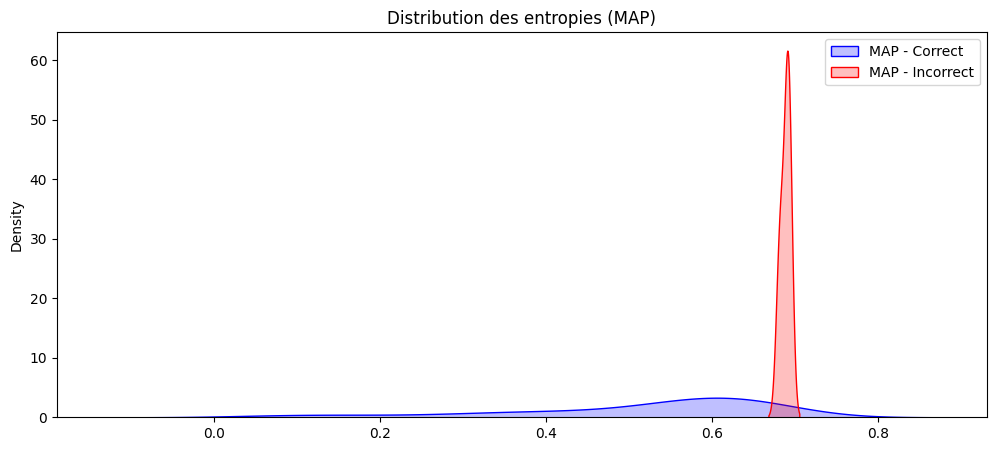

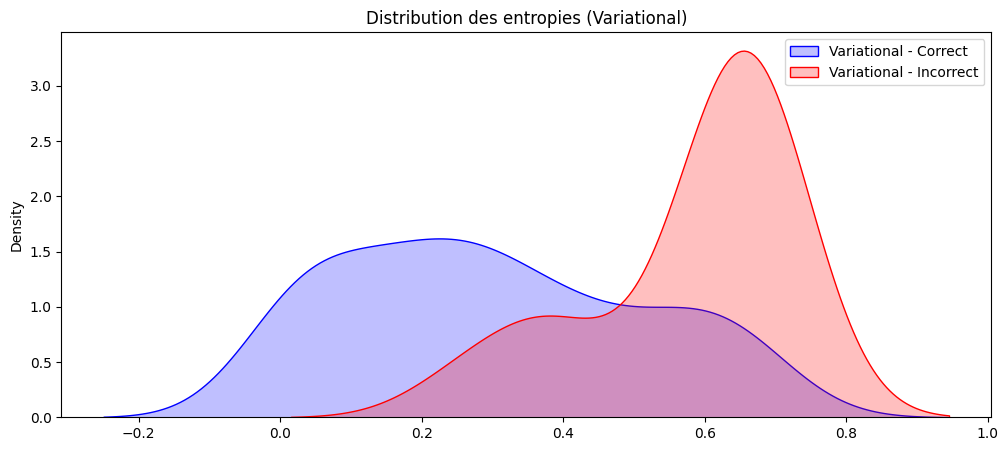

In [ ]:
# ============================
# 6. Tracé des distributions d'entropie
# ============================
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
sns.kdeplot(right_entropy_map, label="MAP - Correct", shade=True, color="blue")
sns.kdeplot(wrong_entropy_map, label="MAP - Incorrect", shade=True, color="red")
plt.title("Distribution des entropies (MAP)")
plt.legend()
plt.show()

plt.figure(figsize=(12, 5))
sns.kdeplot(right_entropy_var, label="Variational - Correct", shade=True, color="blue")
sns.kdeplot(wrong_entropy_var, label="Variational - Incorrect", shade=True, color="red")
plt.title("Distribution des entropies (Variational)")
plt.legend()
plt.show()

# Analysis of Entropy Graphs

## 1. Analysis of the MAP Method
In the first graph:

- Correct predictions (blue) have relatively low entropy, indicating that the model is confident in most of its correct predictions.
- Incorrect predictions (red) have higher entropy, concentrated around 0.6-0.7, suggesting that the model is less certain when it makes mistakes.

**Interpretation**:

- The low entropy for correct predictions shows that the MAP model is well-calibrated for making clear binary decisions.
- However, the fact that errors have relatively high but concentrated entropy may indicate that the MAP model is overly confident even when it is wrong.

---

## 2. Analysis of the Variational Method
In the second graph:

- The entropy distribution for correct predictions (blue) is wider, meaning that some correct predictions are made with higher uncertainty.
- Incorrect predictions (red) have significantly higher entropy, indicating that the model signals greater uncertainty when it is unsure.

**Interpretation**:

- Compared to the MAP method, the variational method seems to better express its uncertainty: when it makes a mistake, the entropy is higher.
- This is an advantage because a good probabilistic model should be able to quantify its uncertainty and avoid overly confident predictions when in doubt.
- This can be particularly useful for decision-making in environments where uncertainty is crucial.
